<a href="https://colab.research.google.com/github/AYSHOTRAX/Unified-Mentor-Projects-Data/blob/main/Heart_Disease_Diagnostic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Objective:

Our objective is to perform a comprehensive analysis of the dataset, including but not limited to:

*   Descriptive statistics of the features.
*   Data visualization to identify patterns and relationships.

*   Correlation analysis to understand the relationships between features.
*   Distribution of the target variable.

*  Identification of potential risk factors for heart disease.

### Import Libraries

In [ ]:
# import all library that will be used in entire project
import numpy as np                               #importing numpy
import pandas as pd                              #imporing pandas
import matplotlib.pyplot as plt                  #imporitng matplotlib
import seaborn as sns                            #importing seaborn

### Dataset Loading

In [ ]:
# Mount google drive for access the dataset of Heart Disease diagnostic
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
HeartDisease_df.head()

Missing values/Null values

In [ ]:
#Checking NULL Values
HeartDisease_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing Values in our Dataset

In [ ]:
#Dataset Info and check how many entries are there left after cleaning the data
HeartDisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#Counting the number of rows and column after cleaning the data set
row, columns = HeartDisease_df.shape
print(f"No of rows: {row}")
print(f"No of columns: {columns}")

No of rows: 1025
No of columns: 14


In [ ]:
#All Columns in the Dataset
HeartDisease_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**There are fourteen features in Dataset**

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

**Percentage of people having Heart Disease**

In [ ]:
num=HeartDisease_df.groupby('target').size()
num

target
0    499
1    526
dtype: int64

In [ ]:
#Converting Numerical Data into Categorical Data
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [ ]:
#Applying converted data into our dataset with new column - Heart_Disease
HeartDisease_df['Heart_Disease']=HeartDisease_df['target'].apply(heart_disease)
HeartDisease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [ ]:
hd=HeartDisease_df.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64


From the overall population, people having heart disease (51%) are more than those who do not have heart disease(49%)

 In this section, the best analysis can be divided into the elderly,middle-aged, young people by looking at the age ranges.

In [ ]:
#Statistical Analysis
Min_Age=HeartDisease_df['age'].min()
Max_Age=HeartDisease_df['age'].max()
Mean_Age=HeartDisease_df['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [ ]:
#Categorical Analysis
Young_Ages=HeartDisease_df[(HeartDisease_df['age']>=29) & (HeartDisease_df['age']<40)]
Middle_Ages=HeartDisease_df[(HeartDisease_df['age']>=40) & (HeartDisease_df['age']<55)]
Elderly_Ages=HeartDisease_df[(HeartDisease_df['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 57
Middle Ages = 419
Elderly Ages = 519


In [ ]:
#Converting Numerical Data into Categorical Data
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [ ]:
#Applying converted data into our dataset with new column - sex1
HeartDisease_df['Gender']=HeartDisease_df['sex'].apply(gender)
HeartDisease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [ ]:
#Converting Numerical Data into Categorical Data
def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [ ]:
#Applying converted data into our dataset with new column - Age_Range
HeartDisease_df['Age_Range']=HeartDisease_df['age'].apply(age_range)
HeartDisease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


From Our Population chart we can say that Number Of Males are more in Middle Age Category and Females are more in Elder Age Category.

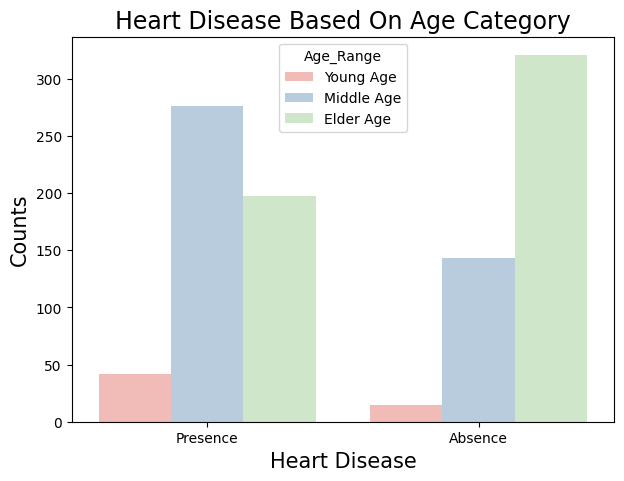

In [ ]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=HeartDisease_df, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

Middle Age People are most AFFECTED by Heart Disease and Elder Age People are mostly FREE from any kind of Heart Disease.

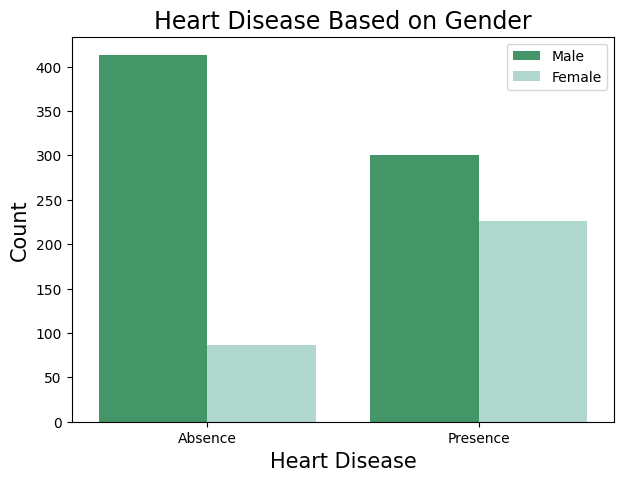

In [ ]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn
plt.figure(figsize=(7,5))
sns.countplot(x=HeartDisease_df['Heart_Disease'], hue='Gender', data=HeartDisease_df, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

We can see that Males are more prone to Heart Disease

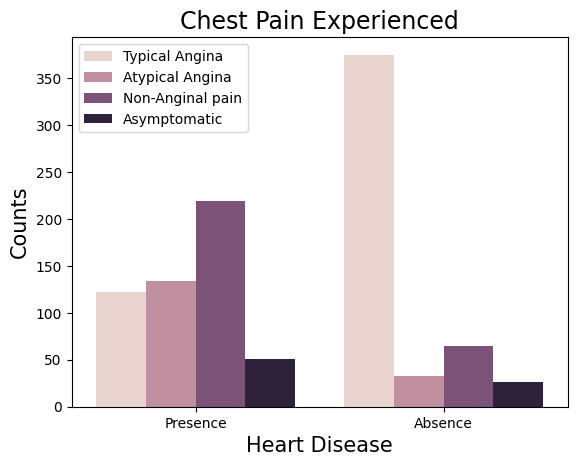

In [ ]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn
sns.countplot(x=HeartDisease_df['Heart_Disease'], hue='cp', data=HeartDisease_df, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

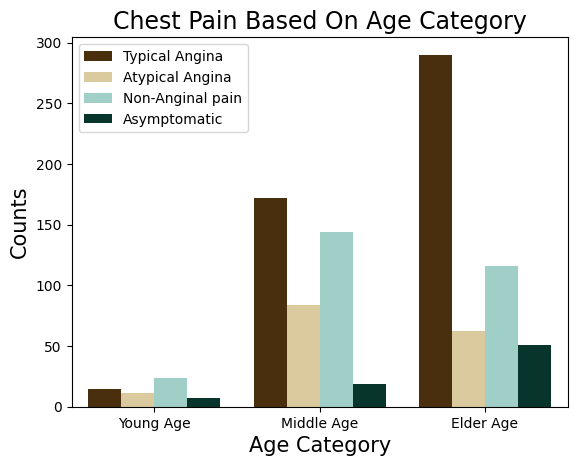

In [ ]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn
sns.countplot(x=HeartDisease_df['Age_Range'], hue='cp', data=HeartDisease_df, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

There is very high number of Typical Angina Pain in Elderly age Category

Females have little bit of higher cholesterol than males.

In [ ]:
#Converting Numerical Data into Categorical Data
def chest_pain(row):
    if row==0:
        return 'Typical Angina'
    elif row==1:
        return 'Atypical Angina'
    elif row==2:
        return 'Non-Anginal pain'
    elif row==3:
      return 'Asymptomatic'

In [ ]:
#Applying converted data into our dataset with new column - Chest Pain
HeartDisease_df['Chest pain']=HeartDisease_df['cp'].apply(chest_pain)
HeartDisease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender,Age_Range,Chest pain
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age,Typical Angina
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age,Typical Angina
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age,Typical Angina
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age,Typical Angina
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age,Typical Angina


In [ ]:
HeartDisease_df.rename(columns ={'trestbps': 'Blood Pressure', 'chol': 'Cholestrol','thalach': 'Max Hearth Rate'}, inplace=True)

In [ ]:
HeartDisease_df.drop(['sex', 'target'], axis=1, inplace=True)

In [ ]:
HeartDisease_df.head()

,age,cp,Blood Pressure,Cholestrol,fbs,restecg,Max Hearth Rate,exang,oldpeak,slope,ca,thal,Heart_Disease,Gender,Age_Range,Chest pain
0,52,0,125,212,0,1,168,0,1.0,2,2,3,Absence,Male,Middle Age,Typical Angina
1,53,0,140,203,1,0,155,1,3.1,0,0,3,Absence,Male,Middle Age,Typical Angina
2,70,0,145,174,0,1,125,1,2.6,0,0,3,Absence,Male,Elder Age,Typical Angina
3,61,0,148,203,0,1,161,0,0.0,2,1,3,Absence,Male,Elder Age,Typical Angina
4,62,0,138,294,1,1,106,0,1.9,1,3,2,Absence,Female,Elder Age,Typical Angina


In [ ]:
HeartDisease_df.isnull().sum()

age                 0
cp                  0
Blood Pressure      0
Cholestrol          0
fbs                 0
restecg             0
Max Hearth Rate     0
exang               0
oldpeak             0
slope               0
ca                  0
thal                0
Heart_Disease       0
Gender              0
Age_Range          30
Chest pain          0
dtype: int64

There is 30 null values in the Age range column.

In [ ]:
# Filling the null values with Not available in the Age range columns
HeartDisease_df['Age_Range'].fillna('Not Available', inplace=True)

In [ ]:
# Again checking for null values
HeartDisease_df.isnull().sum()

age                0
cp                 0
Blood Pressure     0
Cholestrol         0
fbs                0
restecg            0
Max Hearth Rate    0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
Heart_Disease      0
Gender             0
Age_Range          0
Chest pain         0
dtype: int64

In [ ]:
# Converting the Heart disease dataframe into a CSV file
HeartDisease_df.to_csv('Final Heart Disease data.csv')

**Conclusion:**

After conducting a thorough analysis of the dataset on heart disease diagnostics, several key insights have been derived:

1. **Demographic Insights:**
   - The dataset includes individuals across different age groups, with a notable proportion belonging to middle and elder age categories.
   - The gender distribution shows a mix of male and female individuals, indicating a diverse sample population.

2. **Clinical Parameters:**
   - Various clinical parameters such as blood pressure, cholesterol levels, fasting blood sugar, and maximum heart rate have been recorded for each individual.
   - The dataset provides a comprehensive overview of the health status of the individuals, allowing for a detailed analysis of potential risk factors for heart disease.

3. **Risk Factors Analysis:**
   - Exploration of risk factors such as age, gender, and chest pain type reveals potential correlations with the presence or absence of heart disease.
   - Further analysis of risk factors like exercise-induced angina, ST depression, and number of major vessels colored by fluoroscopy can provide deeper insights into the diagnostic process.


4. **Healthcare Implications:**
   - The findings from this analysis can contribute to better understanding and early detection of heart disease, enabling healthcare professionals to implement targeted prevention and intervention strategies.
   - Identifying individuals at higher risk of heart disease can lead to personalized healthcare approaches, including lifestyle modifications and medical interventions.

5. **Further Research Directions:**
   - Future research can focus on exploring additional features or incorporating external datasets to enhance the predictive power of the models.
   - Longitudinal studies and clinical trials may validate the findings and assess the effectiveness of predictive models in real-world healthcare settings.

In conclusion, the analysis of this heart disease diagnostic dataset provides valuable insights into the factors influencing the presence or absence of heart disease. By leveraging advanced analytics and predictive modeling techniques, we can strive towards improving diagnostic accuracy, patient outcomes, and overall cardiovascular health management.